## Temporal Demand Patterns and Seasonality

Step 1: Data preparation
We convert the columns "start_time" and "end_time" to datetime and the generate additional columns for the date, time, hour, month and weekday.

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [106]:
df = pd.read_csv("philadelphia_2017.csv")

In [107]:
for column in ["start_time", "end_time"]:
    df[column] = pd.to_datetime(df[column])
    df[column+"_date"] = df[column].dt.date
    df[column+"_time"] = df[column].dt.time
    df[column+"_hour"] = df[column].dt.hour
    df[column+"_month"] = df[column].dt.month
    df[column+"_week"] = df[column].dt.isocalendar().week
    df[column+"_weekday"] = df[column].dt.weekday

#### Analysis of Rental during the day

First count the started rentals for each hour of the day for the whole dataset and vizualize it in a histogram.

In [94]:
df.groupby(["start_time_hour"])["start_time_hour"].count().reset_index(name="n_rentals_within_hour")

,start_time_hour,n_rentals_within_hour
0,0,7726
1,1,4962
2,2,3373
3,3,1659
4,4,1752
5,5,7271
6,6,20167
7,7,40404
8,8,66331
9,9,40853


In [95]:
mean = df.groupby(["start_time_hour"])["start_time_hour"].count().mean()
mean

32871.125

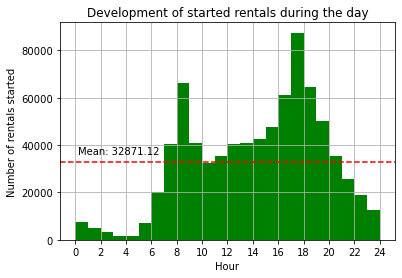

In [96]:
plt.hist(df["start_time_hour"], bins=range(0,25,1), color="green")
plt.axhline(mean , color = 'r', linestyle = '--')
plt.xlabel("Hour")
plt.ylabel("Number of rentals started")
plt.title("Development of started rentals during the day")
plt.xticks(range(0,25,2))
plt.grid(True)
min_xlim, max_xlim = plt.xlim()
plt.text(min_xlim*(-0.2), mean*1.1, 'Mean: {:.2f}'.format(mean))
plt.show()

To get average values we calculate the number of days for which we have data in our dataset and calculate the avarage number of rentals started within each hour in a day.

IMPORTANT: The average values only provide meaningful results if we assume that we have all rental transactions that actually occurred included in our data set.

In [97]:
number_days = len(df["start_time_date"].unique())
number_days

365

In [98]:
df_avg_per_hour = df.groupby(["start_time_hour"])["start_time_hour"].count().divide(number_days).reset_index(name="avg_n_rentals_within_hour")
df_avg_per_hour

,start_time_hour,avg_n_rentals_within_hour
0,0,21.167123
1,1,13.594521
2,2,9.241096
3,3,4.545205
4,4,4.800000
5,5,19.920548
6,6,55.252055
7,7,110.695890
8,8,181.728767
9,9,111.926027


In [99]:
mean= df_avg_per_hour["avg_n_rentals_within_hour"].mean()
mean

90.05787671232876

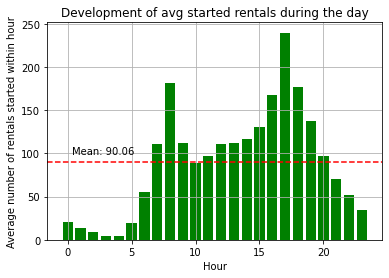

In [100]:
plt.bar(
        df_avg_per_hour["start_time_hour"], 
        df_avg_per_hour["avg_n_rentals_within_hour"], 
        color="green"
)
plt.axhline(mean , color = 'r', linestyle = '--')
plt.xlabel("Hour")
plt.ylabel("Average number of rentals started within hour")
plt.title("Development of avg started rentals during the day")
min_xlim, max_xlim = plt.xlim()
plt.text(min_xlim*(-0.2), mean*1.1, 'Mean: {:.2f}'.format(mean))
plt.grid(True)
plt.show()

In the plots above we only considered the starting times of the rentals. To also considere the endtime, we calculate how many bikes in the respective hours were IN USE accumulated over the year. (e.g. rental from 0 o'clock to 2:45 would count as a usage in hour 0, 1 and 2). In the process of calculation we also have to considere that bikes can be rented out for several days.

In [101]:
df_values = pd.DataFrame()
for i in range(0,24,1):
    df_values[f"{i}"]= (((df["start_time_hour"] <= i) & (df["end_time_hour"] >= i)) 
                        | ((df["end_time_hour"] >= i) & (df["start_time_date"] < df["end_time_date"])))

df_sum = df_values.apply(lambda x: x.sum()/number_days).reset_index(name="avg_n_of_bikes_in_use").rename(columns={"index": "hour"})
df_sum

,hour,avg_n_of_bikes_in_use
0,0,37.969863
1,1,25.605479
2,2,19.534247
3,3,13.673973
4,4,13.200000
5,5,28.863014
6,6,67.904110
7,7,131.383562
8,8,217.268493
9,9,155.221918


In [102]:
mean = df_sum["avg_n_of_bikes_in_use"].mean()
mean

118.83504566210046

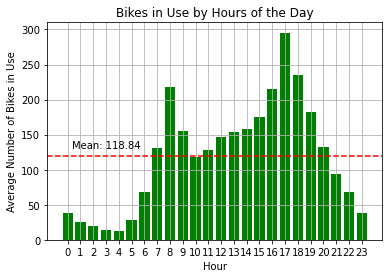

In [103]:
plt.bar(df_sum["hour"], df_sum["avg_n_of_bikes_in_use"], color="green")
plt.axhline(mean , color = 'r', linestyle = '--')
plt.xlabel("Hour")
plt.ylabel("Average Number of Bikes in Use")
plt.title("Bikes in Use by Hours of the Day")
min_xlim, max_xlim = plt.xlim()
plt.text(min_xlim*(-0.2), mean*1.1, 'Mean: {:.2f}'.format(mean))
plt.grid(True)
plt.show()

#### Interpretation of the Result:

The plots abouve all show that we have two peaks of bike rentals in the day. One peak demand at 8 am and the other peak at 5 pm. This peak can be a result of the rush-hour traffic. At these times most people are on their way to work/school or on their way back home. The demand around these times ( 8 am and 5 pm ) are also above average. Besides that it also becomes clear that the bikes are mostly used during the day. During the night the demand is significantly below average (from 9 pm until 6 am).

### Analysis of Rental during the week

First count the started rentals for each weekday of the day for the whole dataset and vizualize it in a histogram.

In [108]:
df.groupby(["start_time_weekday"])["start_time_weekday"].count().reset_index(name="n_rentals_within_weekday")

,start_time_weekday,n_rentals_within_weekday
0,0,112313
1,1,119890
2,2,129499
3,3,124702
4,4,118701
5,5,92786
6,6,91016


In [110]:
df["start_time_weekday"] = df["start_time_weekday"].replace({0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday",5: "Saturday",6: "Sunday"})

In [111]:
mean = df.groupby(["start_time_weekday"])["start_time_weekday"].count().mean()
mean

112701.0

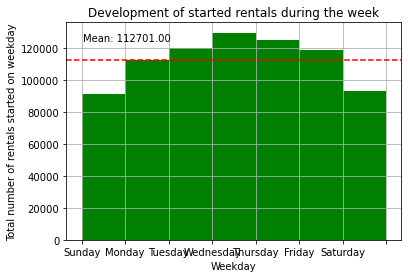

In [112]:
plt.hist(df["start_time_weekday"], bins=range(0,8,1), color="green")
plt.axhline(mean , color = 'r', linestyle = '--')
plt.xlabel("Weekday")
plt.ylabel("Total number of rentals started on weekday")
plt.title("Development of started rentals during the week")
plt.xticks(range(0,8,1))
min_xlim, max_xlim = plt.xlim()
plt.text(min_xlim*(-0.1), mean*1.1, 'Mean: {:.2f}'.format(mean))
plt.grid(True)
plt.show()

To get average values we calculate the number of weeks for which we have data in our dataset and calculate the avarage number of rentals started within each weekday.

IMPORTANT: The average values only provide meaningful results if we assume that we have all rental transactions that actually occurred included in our data set. Otherwise the average values would not make sense. If we for example would have missing rental data for a specific weekday for several weeks, dividing by the total number of weeks would result to false average value for this weekday!

For this reason we not only analyse average values, but also the total numbers of rentals for each weekday.

In [31]:
number_weeks = len(df["start_time_week"].unique())
number_weeks

52

In [33]:
df_average_per_weekday = df.groupby(["start_time_weekday"])["start_time_weekday"].count().divide(number_weeks).reset_index(name="avg_number_started_rentals")
df_average_per_weekday

,start_time_weekday,avg_number_started_rentals
0,0,2159.865385
1,1,2305.576923
2,2,2490.365385
3,3,2398.115385
4,4,2282.711538
5,5,1784.346154
6,6,1750.307692


In [75]:
mean = df_average_per_weekday["avg_number_started_rentals"].mean()
mean

2167.3269230769233

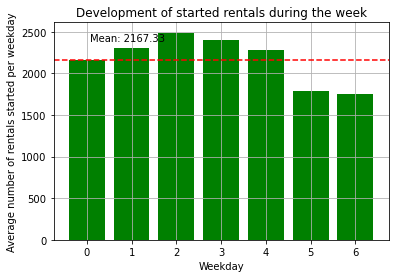

In [76]:
plt.bar(
        df_average_per_weekday["start_time_weekday"], 
        df_average_per_weekday["avg_number_started_rentals"], 
        color="green"
)
plt.axhline(mean, color="r", linestyle="--")
plt.xlabel("Weekday")
plt.ylabel("Average number of rentals started per weekday")
plt.title("Development of started rentals during the week")
min_xlim, max_xlim = plt.xlim()
plt.text(min_xlim*(-0.1), mean*1.1, 'Mean: {:.2f}'.format(mean))
plt.grid(True)
plt.show()

### Analysis of Rental during the Year

First count the started rentals for each month of the year for the whole dataset and vizualize it in a histogram.
Average values can not be calculated since we only have data of one year.

In [77]:
df.groupby(["start_time_month"])["start_time_month"].count().reset_index(name="n_of_retals_in_month")

,start_time_month,n_of_retals_in_month
0,1,31194
1,2,39557
2,3,37021
3,4,66158
4,5,69653
5,6,84630
6,7,91138
7,8,94552
8,9,91095
9,10,88092


In [78]:
mean = df.groupby(["start_time_month"])["start_time_month"].count().mean()
mean

65742.25

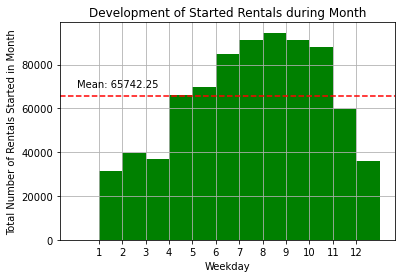

In [84]:
plt.hist(df["start_time_month"], bins=range(0,14,1), color="green")
plt.axhline(mean, color="r", linestyle="--")
plt.xlabel("Weekday")
plt.ylabel("Total Number of Rentals Started in Month")
plt.title("Development of Started Rentals during Month")
plt.xticks(range(1,13,1))
min_xlim, max_xlim = plt.xlim()
plt.text(min_xlim*(-0.1), mean*(1.06), "Mean: {:.2f}".format(mean))
plt.grid(True)
plt.show()

In [160]:
(df["start_time_month"] < df["end_time_month"]).any()
# es gibt Fälle in denen das Fahrrad im nächsten Monata zurückgegeben wurde

True